<a href="https://colab.research.google.com/github/mamekin05108/signatecup2024summer/blob/main/%E5%89%8D%E5%87%A6%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

# warningsを非表示にする
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("/content/drive/MyDrive/Signate/2024summer/data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Signate/2024summer/data/test.csv")

In [4]:
data = pd.concat([train, test], sort=False)

In [5]:
data.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,customer_info,ProdTaken
0,0,50歳,Self Enquiry,2,900秒,Large Business,male,1.0,4.0,Basic,3.0,5,1,4,Executive,253905.0,未婚 車未所持 子供なし,1.0
1,1,56歳,Company Invited,1,14分,Salaried,Male,1.0,4.0,Standard,3.0,2,1,4,Senior Manager,404475.0,"離婚済み,車あり,子供無し",0.0
2,2,NaN,Self Enquiry,1,10分,Large Business,Female,1.0,3.0,Basic,3.0,4,0,4,Executive,278145.0,"結婚済み、自動車未所有,子供なし",1.0
3,3,三十七歳,Self Enquiry,2,1080秒,Small Business,female,1.0,3.0,Standard,4.0,1,0,5,Senior Manager,326805.0,離婚済み、車所持、子供無し,0.0
4,4,48歳,Company Invited,3,1020秒,Small Business,female,1.0,3.0,Basic,4.0,4,0,4,Executive,258435.0,独身／車所持／無子,1.0


In [6]:
def summarize_dataframe(df):
    rows = []
    for col in df.columns:
        dtype = df[col].dtype
        na_count = df[col].isnull().sum()
        unique_count = len(df[col].unique())
        na_rate = na_count / len(df) if len(df) > 0 else None
        rows.append([col, dtype, na_count, unique_count, na_rate])

    summary_df = pd.DataFrame(rows, columns=["列名", "列の型", "NaNである行の数", "値の種類", "NaNの率"])
    return summary_df

In [7]:
summary_df = summarize_dataframe(data)
summary_df

,列名,列の型,NaNである行の数,値の種類,NaNの率
0,id,int64,0,6978,0.000000
1,Age,object,193,257,0.027658
2,TypeofContact,object,18,3,0.002580
3,CityTier,int64,0,3,0.000000
4,DurationOfPitch,object,252,67,0.036113
5,Occupation,object,0,3,0.000000
6,Gender,object,0,18,0.000000
7,NumberOfPersonVisiting,float64,0,4,0.000000
8,NumberOfFollowups,float64,57,13,0.008169
9,ProductPitched,object,0,97,0.000000


とりあえずオブジェクトについてどれだけユニークがあるか

In [8]:
for col in ["Age","DurationOfPitch","Gender","ProductPitched","NumberOfTrips","Designation","MonthlyIncome","customer_info","ProdTaken"]:
    print(col, train[col].unique())

Age ['50歳' '56歳' nan '三十七歳' '48歳' '19歳' '47歳' '49歳' '33歳' '３１歳' '51歳' '46歳'
 '４９歳' '53才' '20歳' '25歳' '五十三歳' '20代' '44歳' '30歳' '34歳' '29歳' '30代' '41歳'
 '50代' '52歳' '22歳' '３６歳' '28歳' '25才' '五十一歳' '48才' '38才' '三十三歳' '42際' '５０代'
 '35才' '59歳' '四十三歳' '32歳' '４２才' '53歳' '58歳' '40代' '二十六歳' '52際' '54歳' '59才'
 '29才' '21才' '57歳' '37歳' '35歳' '36才' '38歳' '３７歳' '50才' '51才' '43歳' '四十歳'
 '26歳' '31歳' '27歳' '40歳' '３４歳' '40際' '21歳' '24才' '45歳' '36歳' '41才' '38際'
 '18歳' '39歳' '４６歳' '４０代' '５５歳' '58際' '24歳' '41際' '三十一歳' '52才' '３０代' '28才'
 '55際' '60代' '27際' '３２歳' '60歳' '五十四歳' '29際' '三十四歳' '４７歳' '37際' '二十四歳'
 '四十七歳' '58才' '39才' '23才' '３３歳' '４２歳' '４５歳' '３９歳' '５４歳' '55歳' '42歳' '３８歳'
 '47才' '５１歳' '３９才' '51際' '二十七歳' '30才' '２６歳' '４０歳' '36際' '三十歳' '23歳' '二十二歳'
 '37才' '３０歳' '２８歳' '34才' '五十歳' '四十一歳' '５９歳' '３５歳' '２２歳' '３７才' '四十九歳' '42才'
 '４４歳' '２５歳' '44際' '33才' '28際' '２４才' '55才' '４８歳' '四十四歳' '31才' '２０代' '二十歳'
 '22際' '31際' '二十三歳' '39際' '59際' '３３才' '三十六歳' '10代' '２７歳' '49才' '４３歳' '32際'
 '４１歳' '33際' '二十五歳' '27才' '46際' '二十九歳

In [9]:
!pip install mojimoji
import mojimoji

### 年齢
- 漢数字
- nullあり

In [10]:
def clean_age_column(df):
    def fullwidth_to_halfwidth(s):
        """全角数字を半角数字に変換する"""
        return s.translate(str.maketrans('０１２３４５６７８９', '0123456789'))

    def extract_age(age_str):
        if pd.isna(age_str):
            return None

        kanji_to_number = {
            '一': 1, '二': 2, '三': 3, '四': 4, '五': 5,
            '六': 6, '七': 7, '八': 8, '九': 9, '十': 10,
            '百': 100
        }

        age_str = fullwidth_to_halfwidth(str(age_str))  # 全角を半角に変換

        result = 0
        temp_number = 0
        has_kanji = False

        for char in age_str:
            if char in kanji_to_number:
                num = kanji_to_number[char]
                if num == 10 or num == 100:
                    temp_number = max(temp_number, 1)
                    result += temp_number * num
                    temp_number = 0
                else:
                    temp_number = num
                has_kanji = True
            elif char.isdigit():
                if has_kanji:
                    result += temp_number
                    temp_number = 0
                result = result * 10 + int(char)
                has_kanji = False
            else:
                if temp_number > 0:
                    result += temp_number
                    temp_number = 0
                has_kanji = False

        if temp_number > 0:
            result += temp_number

        return result if result > 0 else None

    # 年齢を数値に変換して新しい列を作成
    df['Numeric_Age'] = df['Age'].apply(extract_age)

    # 各年代の最頻値を取得
    modes = {}
    for decade in range(10, 70, 10):
        mode_value = df[(df['Numeric_Age'] >= decade) & (df['Numeric_Age'] < decade + 10)]['Numeric_Age'].mode()
        modes[f'{decade}代'] = mode_value.iloc[0] if not mode_value.empty else None

    # 最頻値の確認
    for decade, mode_value in modes.items():
        print(f'{decade}の最頻値: {mode_value}')

    # 年齢層の最頻値で補完
    def get_mode_for_group(group_str):
        group_str = fullwidth_to_halfwidth(group_str)
        if '10代' in group_str:
            return modes['10代']
        elif '20代' in group_str:
            return modes['20代']
        elif '30代' in group_str:
            return modes['30代']
        elif '40代' in group_str:
            return modes['40代']
        elif '50代' in group_str:
            return modes['50代']
        elif '60代' in group_str:
            return modes['60代']
        else:
            return None

    df['Age'] = df['Age'].apply(lambda x: get_mode_for_group(x) if '代' in fullwidth_to_halfwidth(str(x)) else extract_age(x))
    df = df.drop(columns=['Numeric_Age'])

    return df

In [11]:
#def clean_data(df):
#    df = clean_age_column(df)
#    return df
#df_data = clean_data(data)

### DurationOfPitch
問題点
- 分と秒が混在していること →　全部「分」にできそう

In [12]:
def clean_DurationOfPitch_column(df):
    def convert_to_minutes(duration_str):
        if pd.isna(duration_str):
            return None

        duration_str = str(duration_str).strip()

        # 文字列の末尾が「分」の場合
        if duration_str.endswith('分'):
            try:
                minutes = float(duration_str.replace('分', ''))
                return int(minutes)
            except ValueError:
                return None

        # 文字列の末尾が「秒」の場合
        elif duration_str.endswith('秒'):
            try:
                seconds = float(duration_str.replace('秒', ''))
                return int(seconds // 60)  # 秒を分に変換
            except ValueError:
                return None

        # その他の場合はNoneを返す
        return None

    # データフレームのDurationOfPitch列をクリーンアップ
    df['DurationOfPitch'] = df['DurationOfPitch'].apply(convert_to_minutes)

    return df

In [13]:
#def clean_data(df):
#    df = clean_DurationOfPitch_column(df)
#    return df
#data = clean_data(data)

In [14]:
#data.head()

### Gender
- 表記にぶれ
 - 空白
 - 半角・全角混在
 - 大文字小文字


In [15]:
def clean_gender_column(df):
    def extract_gender(gender_str):
        if pd.isna(gender_str):
            return None

        # 全角文字を半角文字に変換するための変換テーブルを作成
        zenkaku = "０１２３４５６７８９ＡＢＣＤＥＦＧＨＩＪＫＬＭＮＯＰＱＲＳＴＵＶＷＸＹＺａｂｃｄｅｆｇｈｉｊｋｌｍｎｏｐｑｒｓｔｕｖｗｘｙｚ　"
        hankaku = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz "
        zenkaku_to_hankaku = str.maketrans(zenkaku, hankaku)

        # 文字列を全角から半角に変換
        cleaned_str = str(gender_str).translate(zenkaku_to_hankaku)

        # 全ての空白文字（全角および半角）を一つの空白に置き換え、トリムして大文字に変換
        cleaned_str = re.sub(r'\s+', ' ', cleaned_str).strip().upper()

        cleaned_str = re.sub(r"[\u3000 \t]", "", cleaned_str)

        return cleaned_str

    df['Gender'] = df['Gender'].apply(extract_gender)
    return df


#train = clean_gender_column(train)
#test = clean_gender_column(test)

In [16]:
#for col in ["Gender_Cleaned"]:
#    print(col, test[col].unique())

### ProductPitched

In [17]:
def clean_ProductPitched_column(df):
    def extract_ProductPitched(ProductPitched_str):
        if pd.isna(ProductPitched_str):
            return None

        # 全角文字を半角文字に変換するための変換テーブルを作成
        zenkaku = "０１２３４５６７８９ＡＢＣＤＥＦＧＨＩＪＫＬＭＮＯＰＱＲＳＴＵＶＷＸＹＺａｂｃｄｅｆｇｈｉｊｋｌｍｎｏｐｑｒｓｔｕｖｗｘｙｚ　"
        hankaku = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz "
        zenkaku_to_hankaku = str.maketrans(zenkaku, hankaku)

        # 文字列を全角から半角に変換
        cleaned_str = str(ProductPitched_str).translate(zenkaku_to_hankaku)

        # 全ての空白文字（全角および半角）を一つの空白に置き換え、トリムして大文字に変換
        cleaned_str = re.sub(r'\s+', ' ', cleaned_str).strip().upper()

        cleaned_str = re.sub(r"[\u3000 \t]", "", cleaned_str)

        # その他の文字
        henmae = "Α𝖺ВΒ𐊡Ꭰᗞ𝙳ΕꓢՏ𝘵Ѕ"
        henato = "AABBBDDDESSTS"
        zenkaku_to_hankaku = str.maketrans(henmae, henato)
        cleaned_str = str(cleaned_str).translate(zenkaku_to_hankaku)

        # 最初の2文字に基づいてプレフィックスを追加
        if cleaned_str.startswith('SU'):
            cleaned_str = 'SUPERDELUXE'
        elif cleaned_str.startswith('BA'):
            cleaned_str = 'BASIC'
        elif cleaned_str.startswith('ST'):
            cleaned_str = 'STANDARD'
        elif cleaned_str.startswith('DE'):
            cleaned_str = 'DELUXE'
        elif cleaned_str.startswith('KI'):
            cleaned_str = 'KING'
        return cleaned_str

    df['ProductPitched'] = df['ProductPitched'].apply(extract_ProductPitched)
    return df

#train = clean_ProductPitched_column(train)
#test = clean_ProductPitched_column(test)

In [18]:
#for col in ["ProductPitched_Cleaned"]:
#    print(col, test[col].unique())

### Designation

In [19]:
def clean_Designation_column(df):
    def extract_Designation(Designation_str):
        if pd.isna(Designation_str):
            return None

        # 全角文字を半角文字に変換するための変換テーブルを作成
        zenkaku = "０１２３４５６７８９ＡＢＣＤＥＦＧＨＩＪＫＬＭＮＯＰＱＲＳＴＵＶＷＸＹＺａｂｃｄｅｆｇｈｉｊｋｌｍｎｏｐｑｒｓｔｕｖｗｘｙｚ　"
        hankaku = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz "
        zenkaku_to_hankaku = str.maketrans(zenkaku, hankaku)

        # 文字列を全角から半角に変換
        cleaned_str = str(Designation_str).translate(zenkaku_to_hankaku)

        # 文字列を全角から半角に変換
        cleaned_str = str(Designation_str).translate(zenkaku_to_hankaku)

        # 全ての空白文字（全角および半角）を一つの空白に置き換え、トリムして大文字に変換
        cleaned_str = re.sub(r'\s+', ' ', cleaned_str).strip().upper()

        cleaned_str = re.sub(r"[\u3000 \t]", "", cleaned_str)


        # その他の文字
        henmae = "АΑЕEＰ×ΜMSՏSЅ"
        henato = "AAEEPXMMSSSS"
        zenkaku_to_hankaku = str.maketrans(henmae, henato)
        cleaned_str = str(cleaned_str).translate(zenkaku_to_hankaku)


        # 最初の2文字に基づいてプレフィックスを追加
        if cleaned_str.startswith('AV'):
            cleaned_str = 'AVP'
        elif cleaned_str.startswith('SE'):
            cleaned_str = 'Senior Manager'
        elif cleaned_str.startswith('EX'):
            cleaned_str = 'Executive'
        elif cleaned_str.startswith('MA'):
            cleaned_str = 'Manager'
        elif cleaned_str.startswith('VP'):
            cleaned_str = 'VP'
        return cleaned_str

    df['Designation'] = df['Designation'].apply(extract_Designation)
    return df


### NumberOfTrips

In [20]:
def clean_NumberOfTrips_column(df):
    def extract_NumberOfTrips(NumberOfTrips_str):
        # 欠損値を処理
        if pd.isna(NumberOfTrips_str):
            return None

        # 日本語表現を数値にマッピング
        mapping = {
            '年に1回': 1,
            '年に2回': 2,
            '年に3回': 3,
            '年に4回': 4,
            '年に5回': 5,
            '年に6回': 6,
            '年に7回': 7,
            '年に8回': 8,
            '半年に1回': 2,  # 半年に1回は年に2回
            '四半期に1回': 4  # 四半期に1回は年に4回
        }

        # 日本語表現を数値に置換
        if NumberOfTrips_str in mapping:
            return mapping[NumberOfTrips_str]

        # 残りの文字列を数値に変換
        try:
            return float(NumberOfTrips_str)
        except ValueError:
            return None

    # データフレームのNumberOfTrips列をクリーンアップ
    df['NumberOfTrips'] = df['NumberOfTrips'].apply(extract_NumberOfTrips)

    # 列の型をfloat64に変換
    df['NumberOfTrips'] = df['NumberOfTrips'].astype('float64')
    return df


In [21]:
data.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,customer_info,ProdTaken
0,0,50歳,Self Enquiry,2,900秒,Large Business,male,1.0,4.0,Basic,3.0,5,1,4,Executive,253905.0,未婚 車未所持 子供なし,1.0
1,1,56歳,Company Invited,1,14分,Salaried,Male,1.0,4.0,Standard,3.0,2,1,4,Senior Manager,404475.0,"離婚済み,車あり,子供無し",0.0
2,2,NaN,Self Enquiry,1,10分,Large Business,Female,1.0,3.0,Basic,3.0,4,0,4,Executive,278145.0,"結婚済み、自動車未所有,子供なし",1.0
3,3,三十七歳,Self Enquiry,2,1080秒,Small Business,female,1.0,3.0,Standard,4.0,1,0,5,Senior Manager,326805.0,離婚済み、車所持、子供無し,0.0
4,4,48歳,Company Invited,3,1020秒,Small Business,female,1.0,3.0,Basic,4.0,4,0,4,Executive,258435.0,独身／車所持／無子,1.0


### MonthlyIncome
- 月収丸々万円がいる

In [22]:
def clean_MonthlyIncome_column(df):
    def extract_MonthlyIncome(MonthlyIncome_str):
        if pd.isna(MonthlyIncome_str):
            return None

        # 文字列を小文字に変換（任意）
        #MonthlyIncome_str = str(MonthlyIncome_str).lower()

        # 数字と単位を抽出
        match = re.search(r'([\d.,]+)\s*(万|千)?', MonthlyIncome_str)

        if match:
            number_str, unit = match.groups()
            number_str = number_str.replace(',', '')  # カンマを削除
            number = float(number_str)

            # 単位に応じて数値を変換
            if unit == '万':
                income = number * 10000
            elif unit == '千':
                income = number * 1000
            else:
                income = number
        else:
            # マッチしない場合は NaN
            income = None

        return income

    df['MonthlyIncome'] = df['MonthlyIncome'].apply(extract_MonthlyIncome)
    return df

# trainがあなたのDataFrameであると仮定してい#ます
#train = clean_MonthlyIncome_column(train)
#test = clean_MonthlyIncome_column(test)

### customer_info
- 結婚
- 車
- 子供  

に分けることができそう。ただしいずれも表示にぶれあり  
区切りもスペース改行スラッシュコンマといろいろなのでいったん何かに置換すべき

In [23]:
def parse_customer_info(info):
    if pd.isna(info):
        return None, None, None

    # 各項目の初期値を設定
    marital_status = None
    car_ownership = None
    children = None

    # 婚姻状況の抽出
    if re.search(r'未婚', info):
        marital_status = '未婚'
    elif re.search(r'独身', info):
        marital_status = '独身'
    elif re.search(r'結婚|既婚', info):
        marital_status = '結婚'
    elif re.search(r'離婚', info):
        marital_status = '離婚'

    # 車の所有の抽出
    if re.search(r'車(未所持|未所有|保有なし|なし)', info):
        car_ownership = 'なし'
    elif re.search(r'車(あり|所持|保有|所有)', info):
        car_ownership = 'あり'

    # 子供の有無の抽出
    children = re.search(r'子供[無な|無し|ゼロ]|こども[無な|無し]|無子|非育児家庭', info)
    if children:
        children = 0
    else:
        children = re.search(r'子供有り|こども有り|子供[0-9]+人|こども[0-9]+人|[0-9]児', info)
        if children:
            children = re.search(r'[0-9]+', info)
            children = children.group(0) if children else 'あり'

    return marital_status, car_ownership, children

def clean_customer_info(df):
    df[['MaritalStatus', 'OwnCar', 'NumberOfChildren']] = df['customer_info'].apply(lambda x: pd.Series(parse_customer_info(x)))
    return df


### NumberOfFollowups
- 100以上の数字がある

In [24]:
def clean_NumberOfFollowups_column(df):
    df['NumberOfFollowups'] = df['NumberOfFollowups'].apply(lambda x: x / 100 if x >= 100 else x)
    return df

### 年齢層・収入層

In [25]:
def Agebin_column(df):
  df['Agebin'] = pd.cut(df['Age'], bins = [0,25, 31, 40, 50, 65], labels = ['0-25','26-30', '31-40', '41-50', '51-65'])
  return df

In [26]:
def Incomebin_column(df):
  df['Incomebin'] = pd.cut(df['MonthlyIncome'], bins = [0,200000,250000, 300000, 350000,400000,450000,500000,550000,600000], labels = ['<200000', '<250000', '<300000', '<350000','<400000','<450000','<500000','<550000','<600000'])
  return df

## でいったんきれいにした

In [27]:
def clean_data(df):
    df = clean_age_column(df)
    df = clean_DurationOfPitch_column(df)
    df = clean_gender_column(df)
    df = clean_ProductPitched_column(df)
    df = clean_Designation_column(df)
    df = clean_NumberOfTrips_column(df)
    df = clean_MonthlyIncome_column(df)
    df = clean_customer_info(df)
    df = clean_NumberOfFollowups_column(df)
    df = Agebin_column(df)
    df = Incomebin_column(df)
    df = df.drop(columns=['customer_info'])
    return df

data = clean_data(data)


10代の最頻値: 19.0
20代の最頻値: 28.0
30代の最頻値: 30.0
40代の最頻値: 40.0
50代の最頻値: 50.0
60代の最頻値: 60.0


In [28]:
summary_df = summarize_dataframe(data)
summary_df

,列名,列の型,NaNである行の数,値の種類,NaNの率
0,id,int64,0,6978,0.000000
1,Age,float64,193,45,0.027658
2,TypeofContact,object,18,3,0.002580
3,CityTier,int64,0,3,0.000000
4,DurationOfPitch,float64,252,34,0.036113
5,Occupation,object,0,3,0.000000
6,Gender,object,0,2,0.000000
7,NumberOfPersonVisiting,float64,0,4,0.000000
8,NumberOfFollowups,float64,57,7,0.008169
9,ProductPitched,object,0,5,0.000000


In [29]:
  # 列の型をfloat64に変換
  data['NumberOfChildren'] = data['NumberOfChildren'].astype('float64')

In [30]:
df_train = data[:len(train)]
df_test = data[len(train):]

In [31]:
df_test.to_csv("/content/drive/MyDrive/Signate/2024summer/fdata/df_test.csv", index=False)
df_train.to_csv("/content/drive/MyDrive/Signate/2024summer/fdata/df_train.csv", index=False)

In [32]:
summary_df = summarize_dataframe(df_train)
summary_df

,列名,列の型,NaNである行の数,値の種類,NaNの率
0,id,int64,0,3489,0.000000
1,Age,float64,100,45,0.028662
2,TypeofContact,object,6,3,0.001720
3,CityTier,int64,0,3,0.000000
4,DurationOfPitch,float64,121,34,0.034680
5,Occupation,object,0,3,0.000000
6,Gender,object,0,2,0.000000
7,NumberOfPersonVisiting,float64,0,4,0.000000
8,NumberOfFollowups,float64,33,7,0.009458
9,ProductPitched,object,0,5,0.000000


In [33]:
cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]

In [34]:
for i in cat_cols:
    print('Unique values in',i, 'are :')
    print(df_train[i].value_counts())
    print('*'*50)

Unique values in Designation are :
Designation
Executive         1150
Manager           1055
Senior Manager     854
AVP                311
VP                 119
Name: count, dtype: int64
**************************************************
Unique values in ProdTaken are :
ProdTaken
0.0    2992
1.0     497
Name: count, dtype: int64
**************************************************
Unique values in OwnCar are :
OwnCar
なし    1785
あり    1704
Name: count, dtype: int64
**************************************************
Unique values in Passport are :
Passport
0    3131
1     358
Name: count, dtype: int64
**************************************************
Unique values in CityTier are :
CityTier
2    1596
1    1475
3     418
Name: count, dtype: int64
**************************************************
Unique values in MaritalStatus are :
MaritalStatus
結婚    1384
離婚     878
独身     646
未婚     581
Name: count, dtype: int64
**************************************************
Unique values in Produc

In [35]:
df_train[cat_cols] = df_train[cat_cols].astype('category')

In [36]:
df_train.describe(include=['category']).T


,count,unique,top,freq
TypeofContact,3483,2,Self Enquiry,2194
CityTier,3489,3,2,1596
Occupation,3489,3,Small Business,1727
Gender,3489,2,MALE,2064
ProductPitched,3489,5,BASIC,1157
Passport,3489,2,0,3131
Designation,3489,5,Executive,1150
ProdTaken,3489.0,2.0,0.0,2992.0
MaritalStatus,3489,4,結婚,1384
OwnCar,3489,2,なし,1785


In [37]:
def dist_box(data):
    # 関数は連続変数の単変量分析のためのグラフをプロットします。
    # データの広がり、集中傾向、分散、および外れ値を確認するためのものです。

    Name = data.name.upper()
    fig, (ax_box, ax_dis) = plt.subplots(nrows=2, sharex=True,
                                         gridspec_kw={"height_ratios": (.25, .75)},
                                         figsize=(8, 5))

    mean = data.mean()
    median = data.median()
    mode = data.mode().tolist()[0]

    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR " + Name, fontsize=18, fontweight='bold')

    # Boxplot
    sns.boxplot(x=data, showmeans=True, orient='h', color="teal", ax=ax_box)
    ax_box.set(xlabel='')

    # 背景を白く設定
    sns.despine(top=True, right=True, left=True)

    # Histogram (代わりに histplot を使用)
    sns.histplot(data, kde=False, color='purple', ax=ax_dis)

    # 平均、中央値、最頻値の線を追加
    ax_dis.axvline(mean, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
    ax_dis.axvline(median, color='g', linestyle='-', linewidth=2, label=f'Median: {median:.2f}')
    ax_dis.axvline(mode, color='y', linestyle='-', linewidth=2, label=f'Mode: {mode:.2f}')

    # 凡例を追加
    ax_dis.legend()

    plt.show()

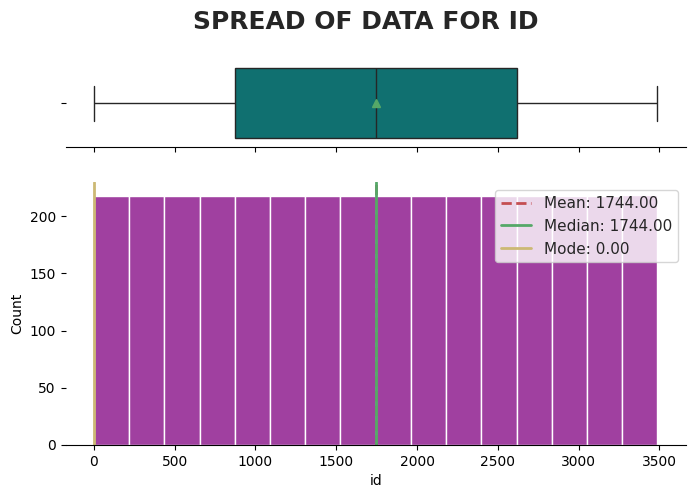

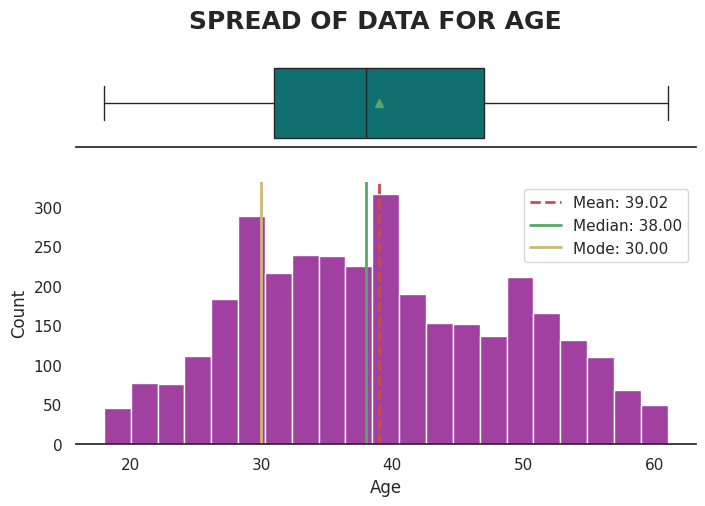

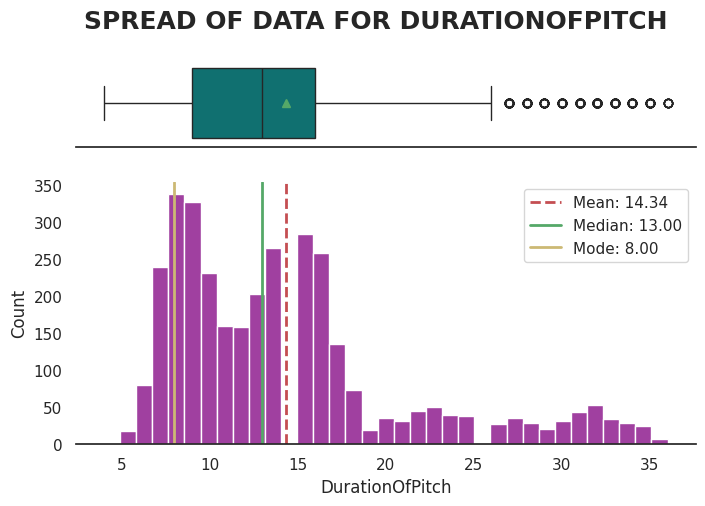

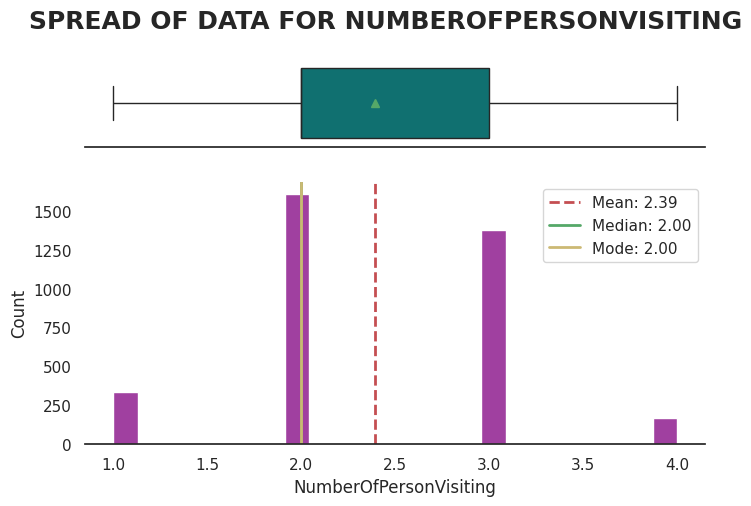

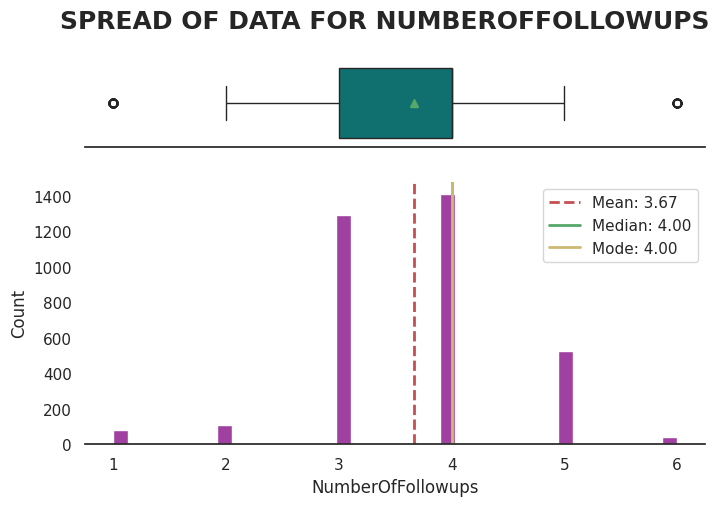

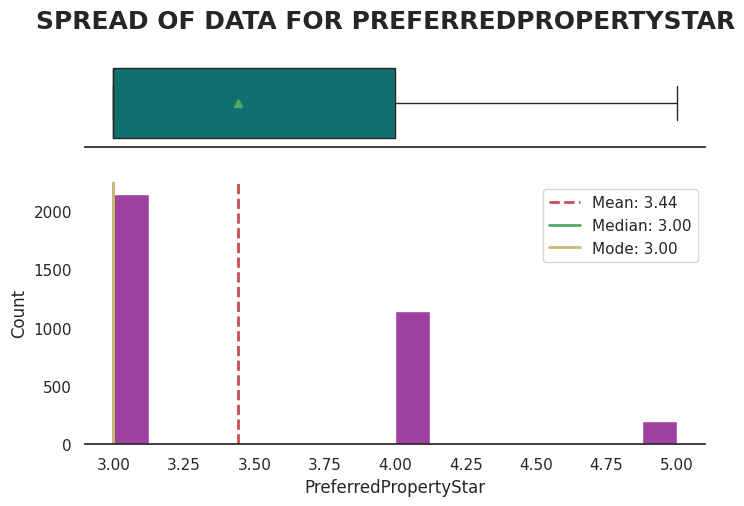

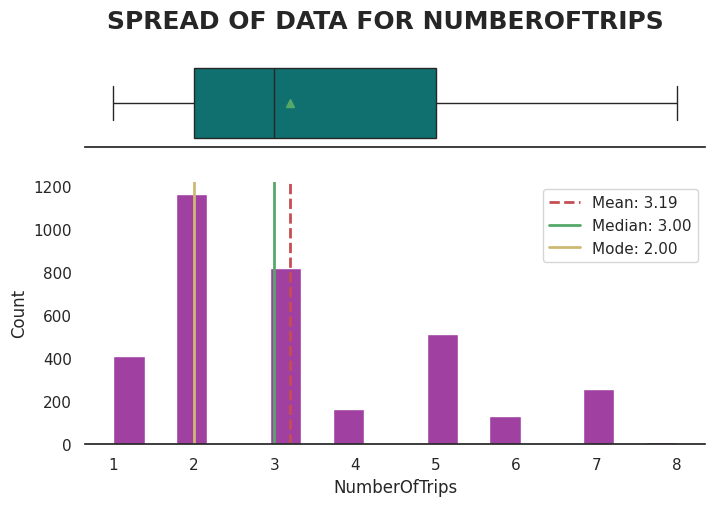

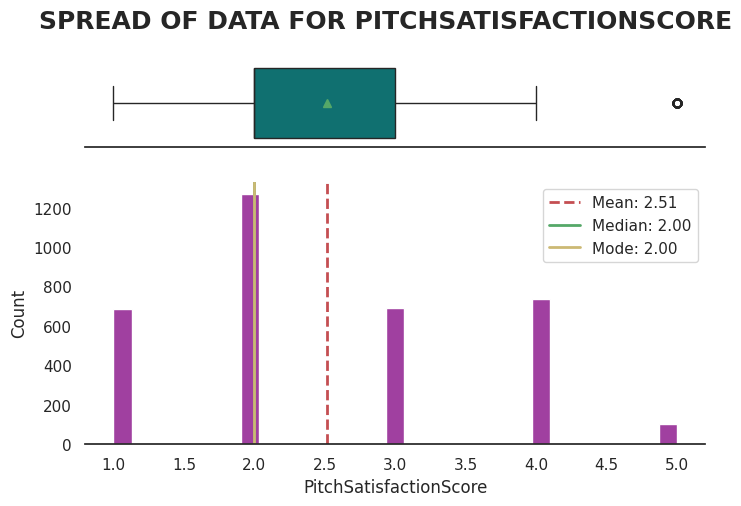

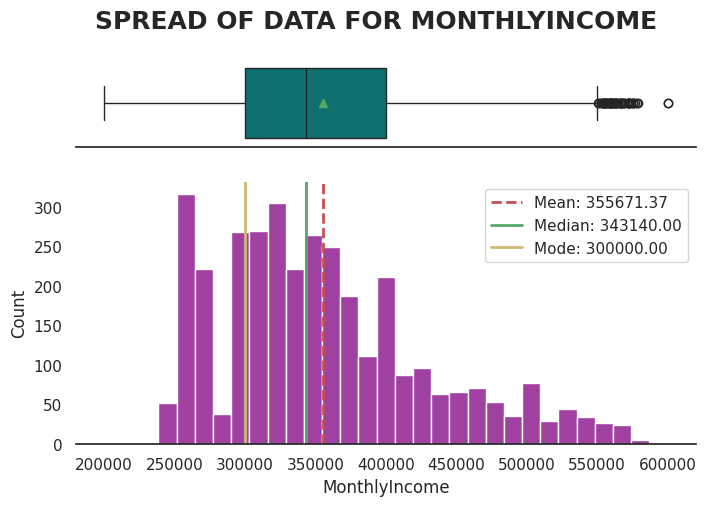

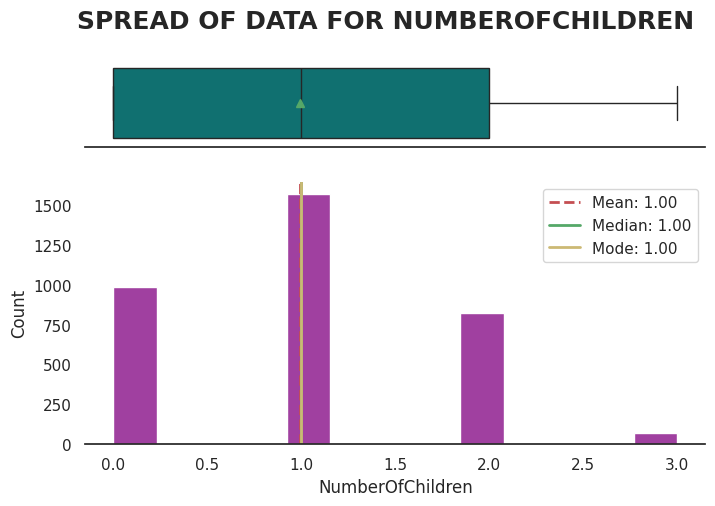

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#select all quantitative columns for checking the spread
list_col=  df_train.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(df_train[list_col[i]])


In [39]:
!pip install japanize-matplotlib
import japanize_matplotlib

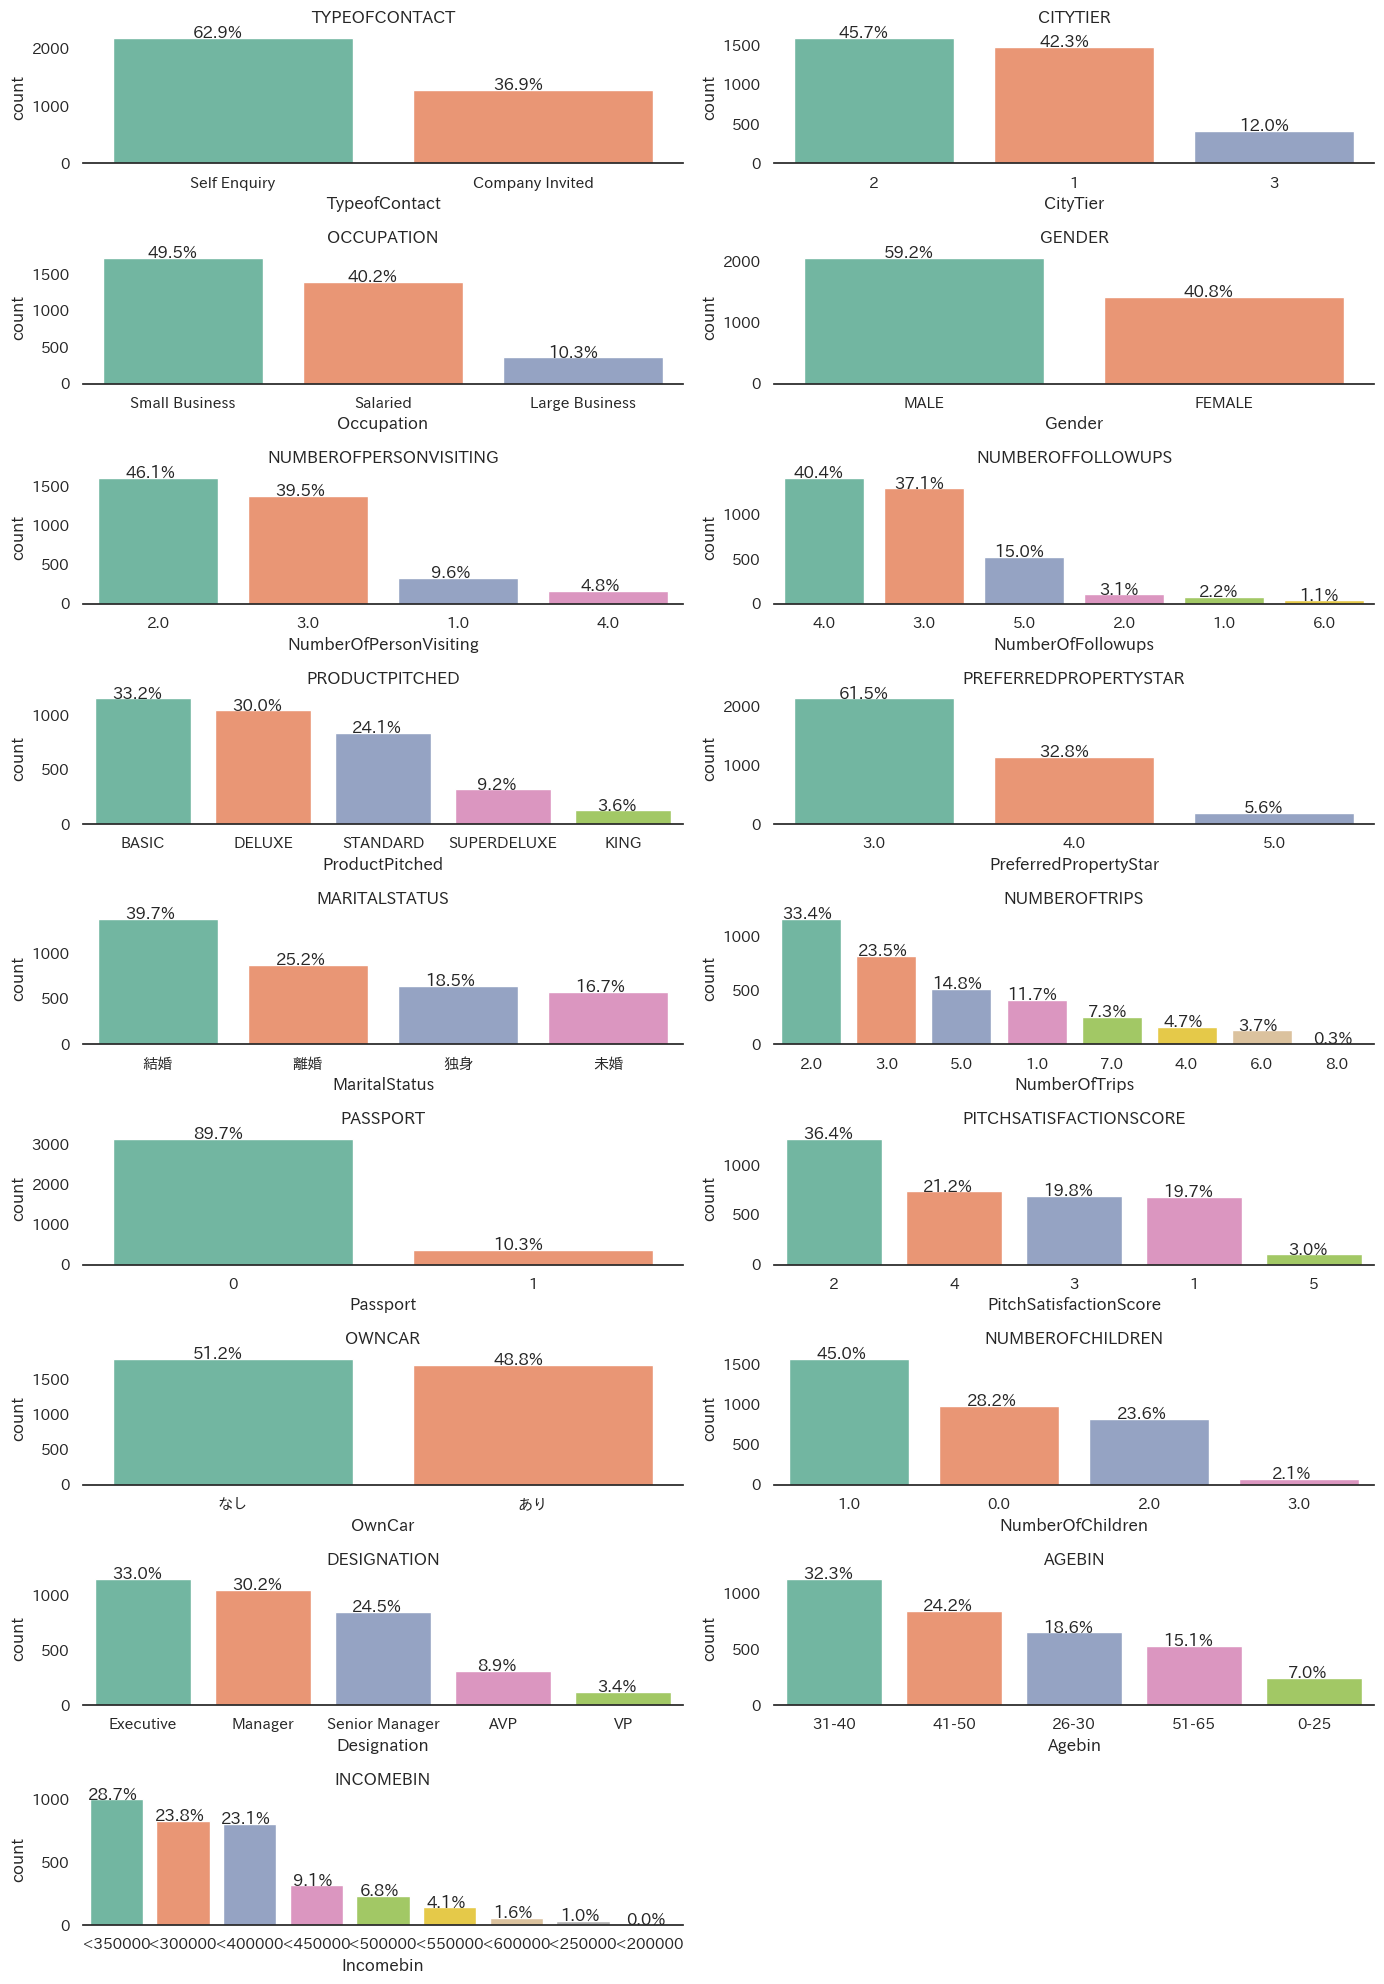

In [40]:
plt.figure(figsize=(14,20))


sns.set_theme(style="white")
cols=['TypeofContact', 'CityTier', 'Occupation', 'Gender',
        'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched',
        'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips',
        'Passport', 'PitchSatisfactionScore',
        'OwnCar', 'NumberOfChildren',
        'Designation','Agebin','Incomebin']

# japanize_matplotlibを適用して日本語をサポート
japanize_matplotlib.japanize()

for i, variable in enumerate(cols):
    plt.subplot(9,2,i+1)
    order = df_train[variable].value_counts(ascending=False).index
    #sns.set_palette('Set2')
    #ax = sns.countplot(x=df_train[variable], data=df_train)
    ax = sns.countplot(x=variable, data=df_train, palette='Set2', order=order)
    sns.despine(top=True, right=True, left=True)  # グラフの側面線を削除
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / len(df_train[variable]))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.annotate(percentage, (x, y), ha='center')
    plt.tight_layout()
    plt.title(cols[i].upper())

plt.show()

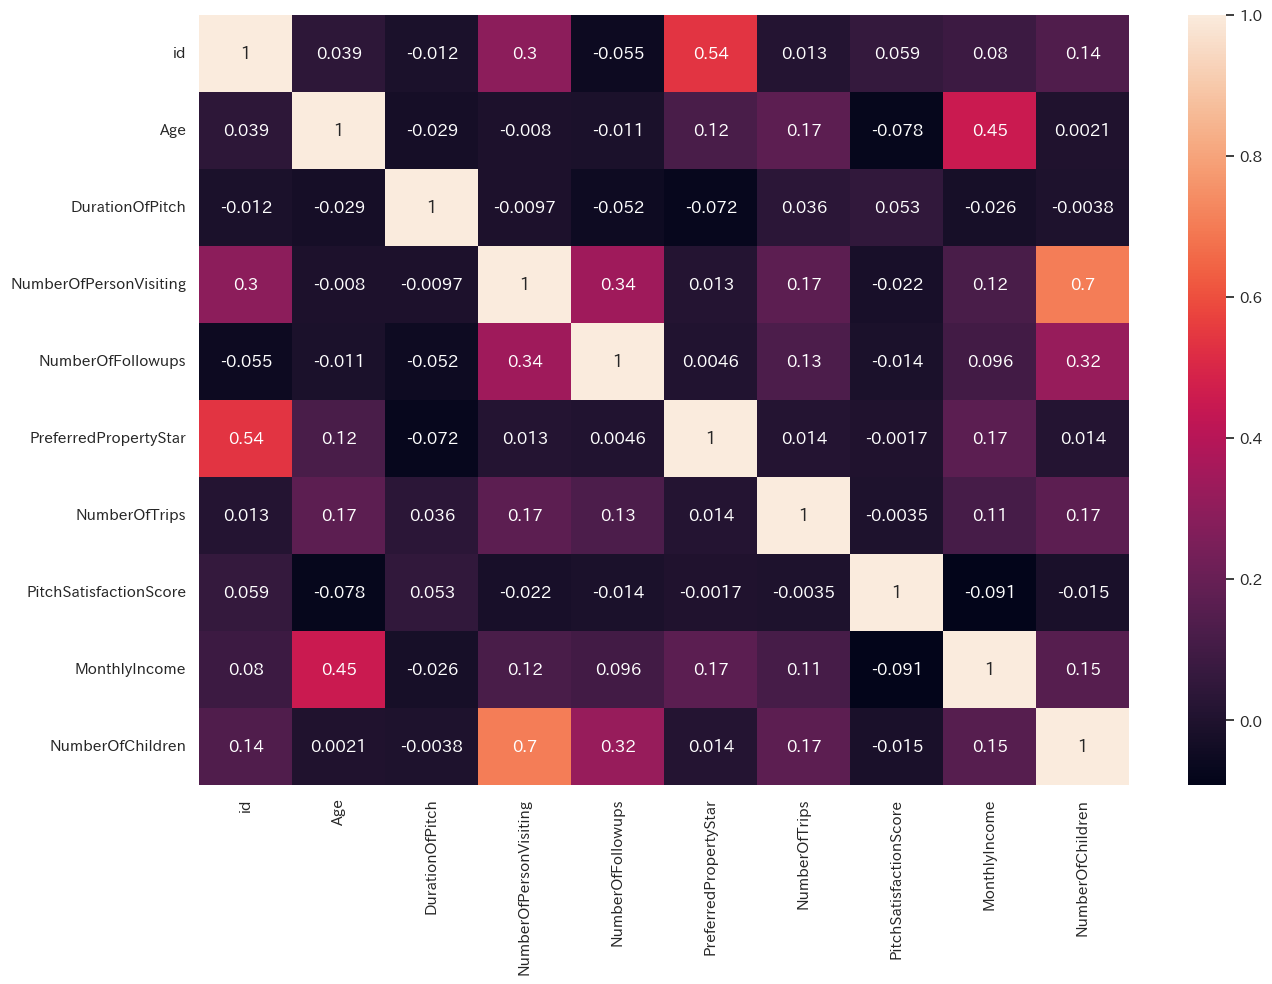

In [41]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
numeric_df = df_train.select_dtypes(include=['float64', 'int64']).dropna()
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

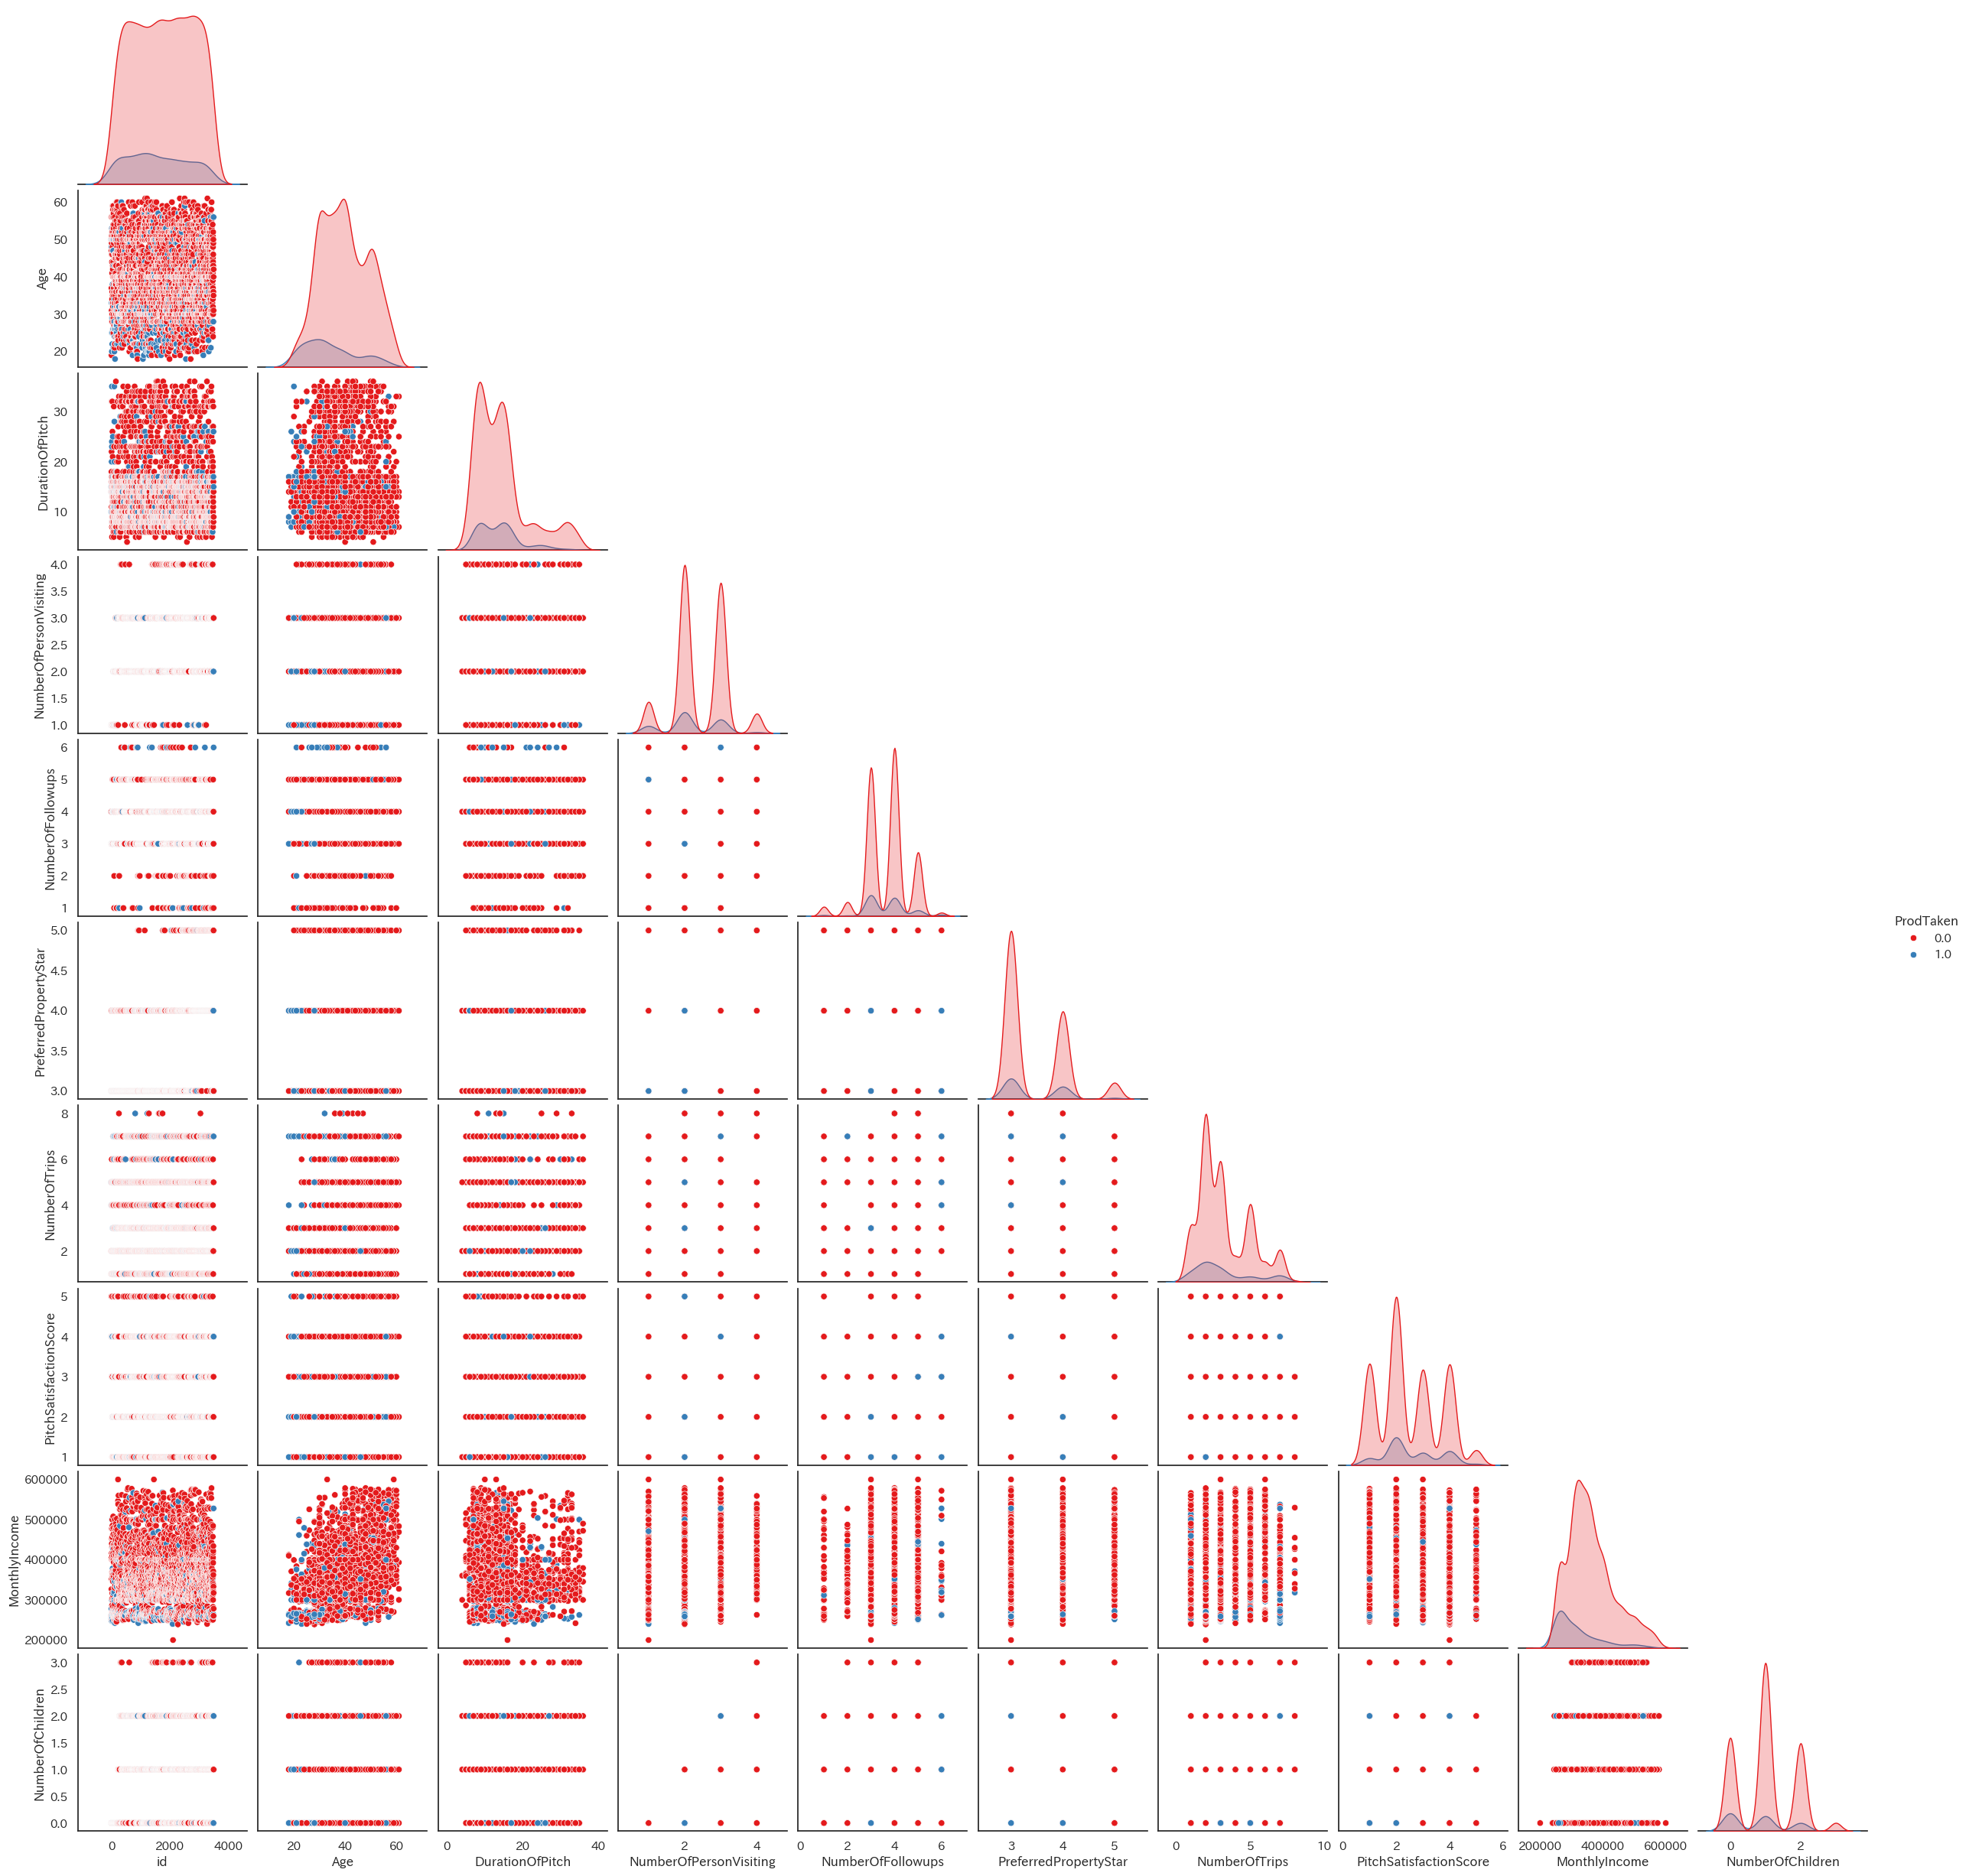

In [42]:
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(df_train, hue="ProdTaken",corner=True)
plt.show()

In [45]:
### Function to plot distributions and Boxplots of customers
def plot(x, target='ProdTaken'):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Distribution of x for customers who did not take the product
    axs[0, 0].set_title(f'Distribution of {x}\n for customers who did not take the product', fontsize=12, fontweight='bold')
    sns.histplot(df_train[df_train[target] == 0][x], kde=True, ax=axs[0, 0], color='teal')

    # Distribution of x for customers who took the product
    axs[0, 1].set_title(f'Distribution of {x}\n for customers who took the product', fontsize=12, fontweight='bold')
    sns.histplot(df_train[df_train[target] == 1][x], kde=True, ax=axs[0, 1], color='orange')

    # Boxplot of x with respect to product taken
    axs[1, 0].set_title(f'Boxplot of {x} w.r.t Product Taken', fontsize=12, fontweight='bold')
    sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 0], palette='gist_rainbow', showmeans=True)

    # Line to separate the plots
    line = plt.Line2D((.1, .9), (.5, .5), color='grey', linewidth=1.5, linestyle='--')
    fig.add_artist(line)

    # Boxplot of x with respect to product taken (without outliers)
    axs[1, 1].set_title(f'Boxplot of {x} w.r.t Product Taken - Without outliers', fontsize=12, fontweight='bold')
    sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 1], showfliers=False, palette='gist_rainbow', showmeans=True)

    # Remove side lines from graphs
    sns.despine(top=True, right=True, left=True)

    plt.tight_layout(pad=4)
    plt.show()

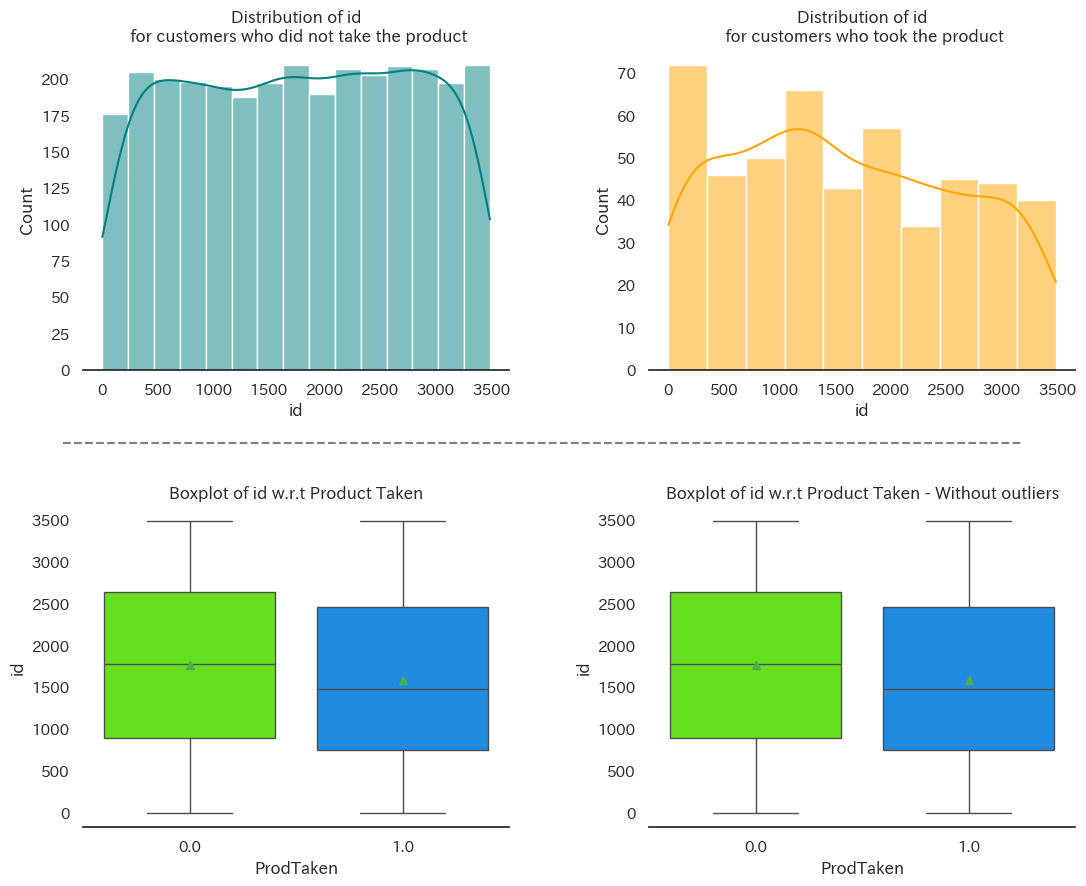

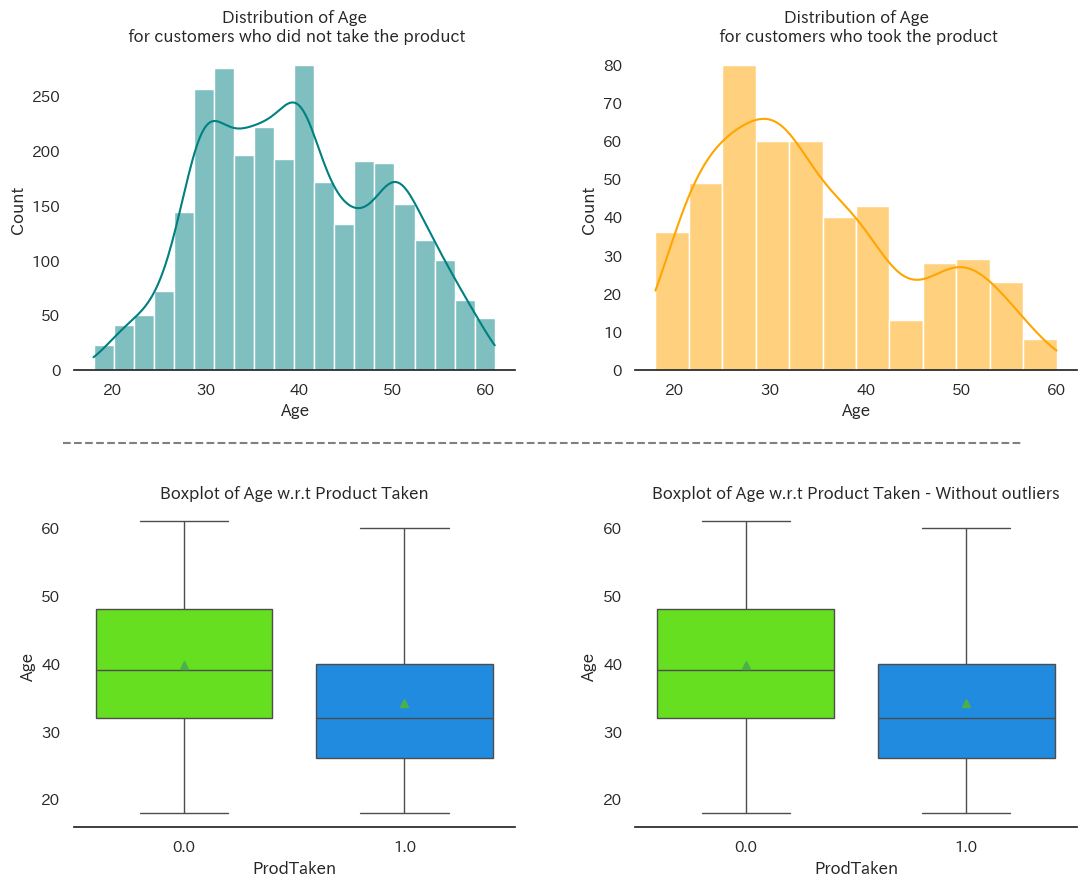

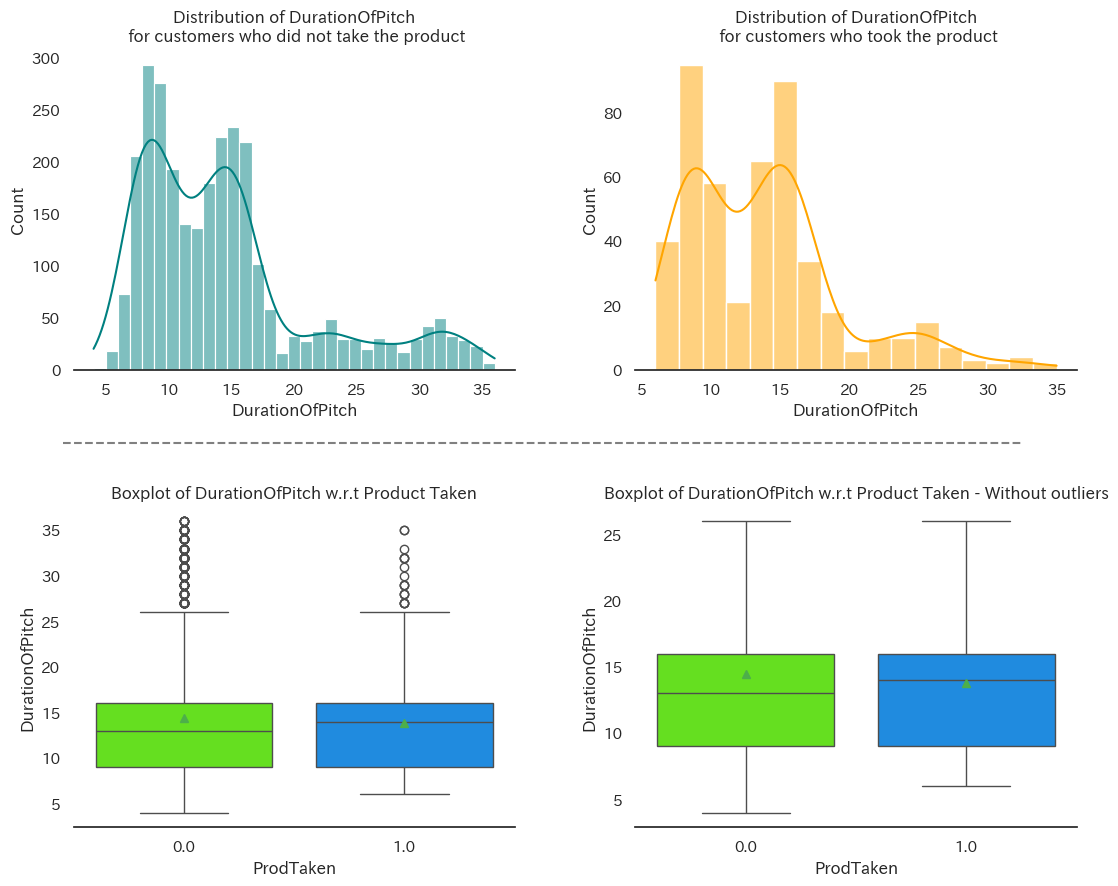

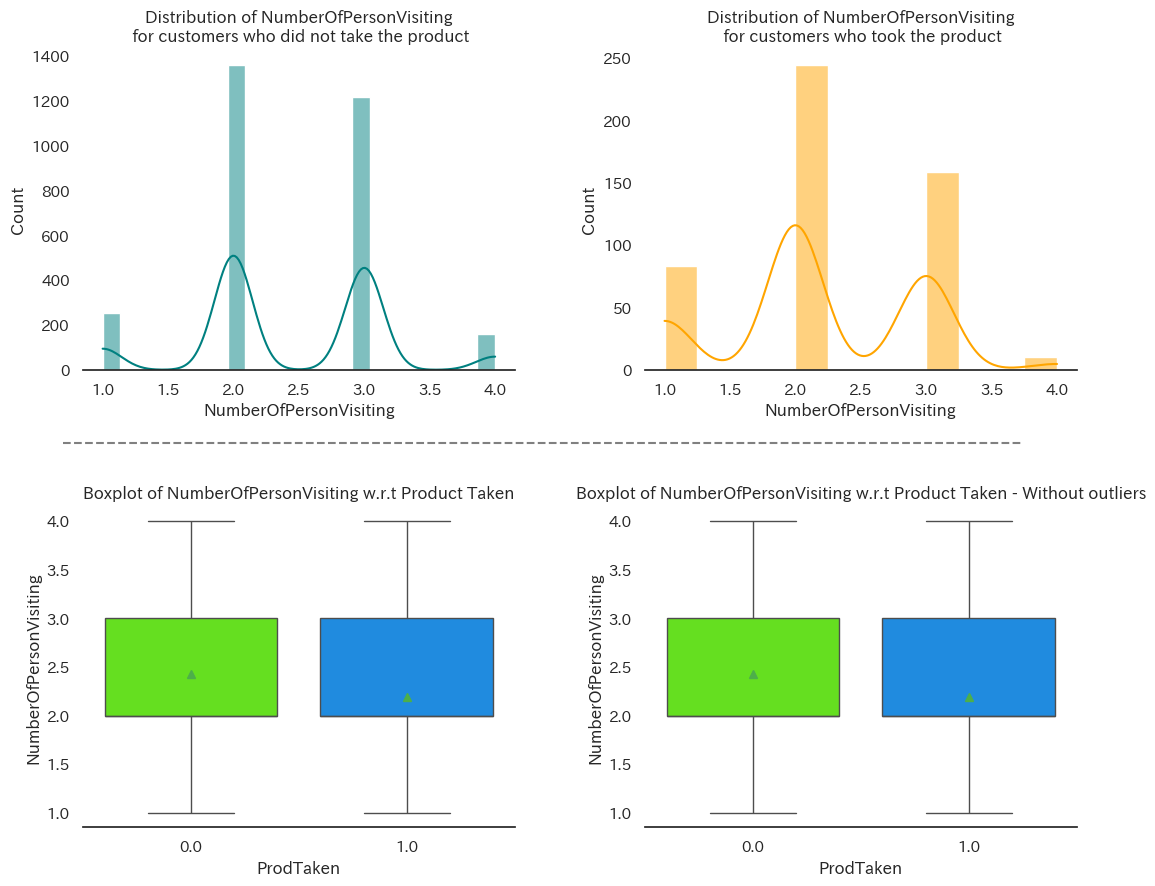

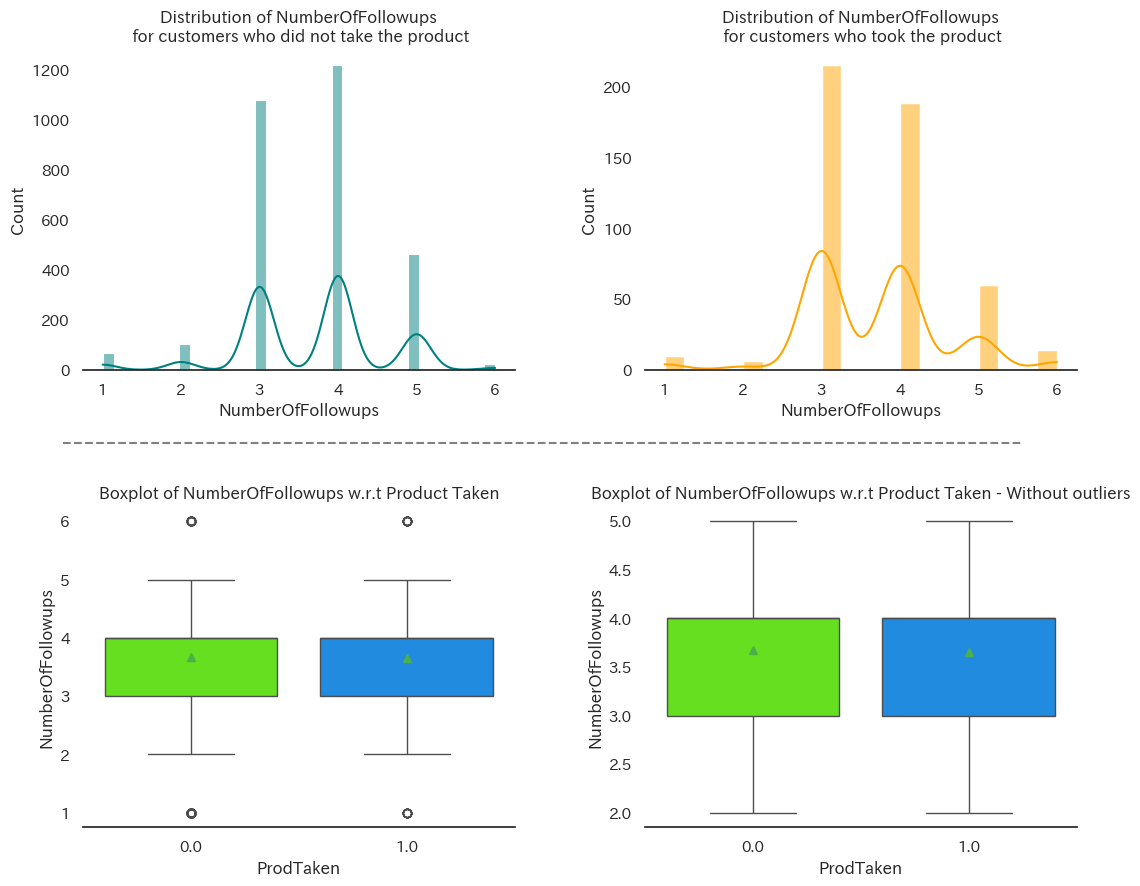

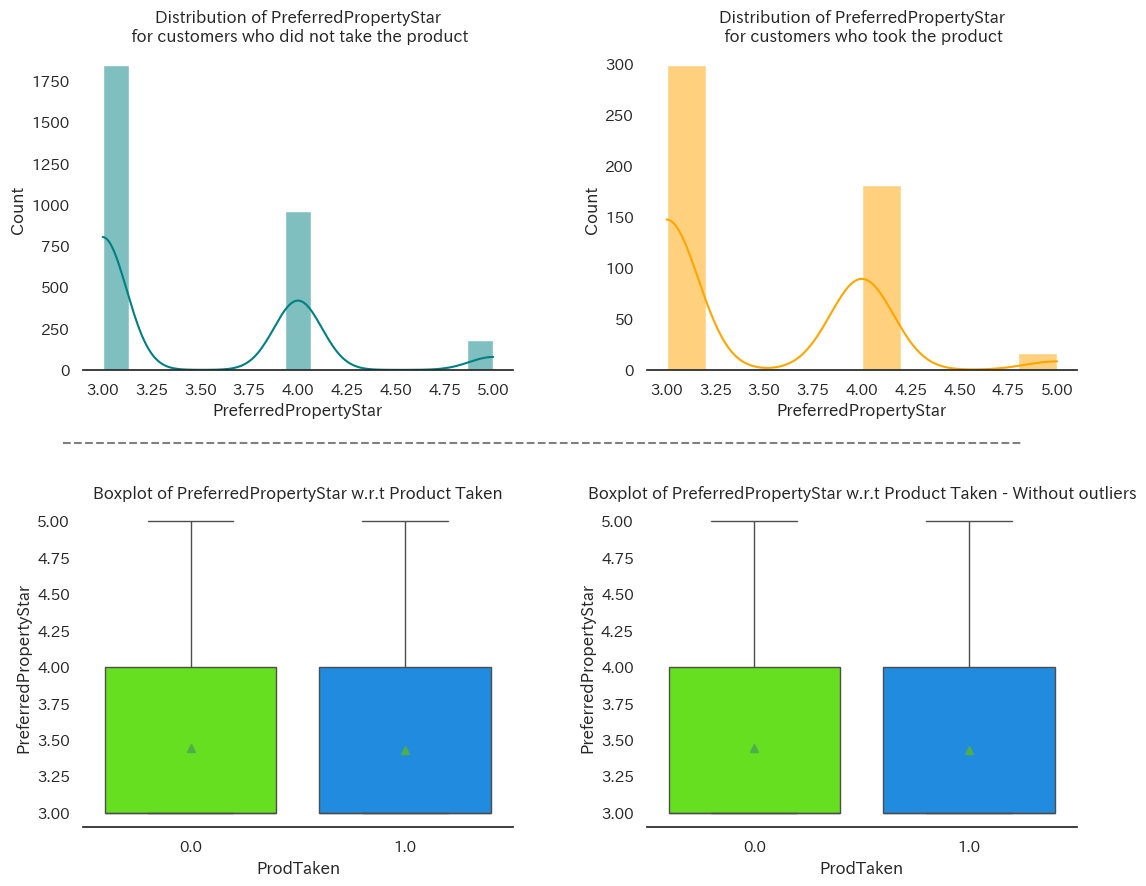

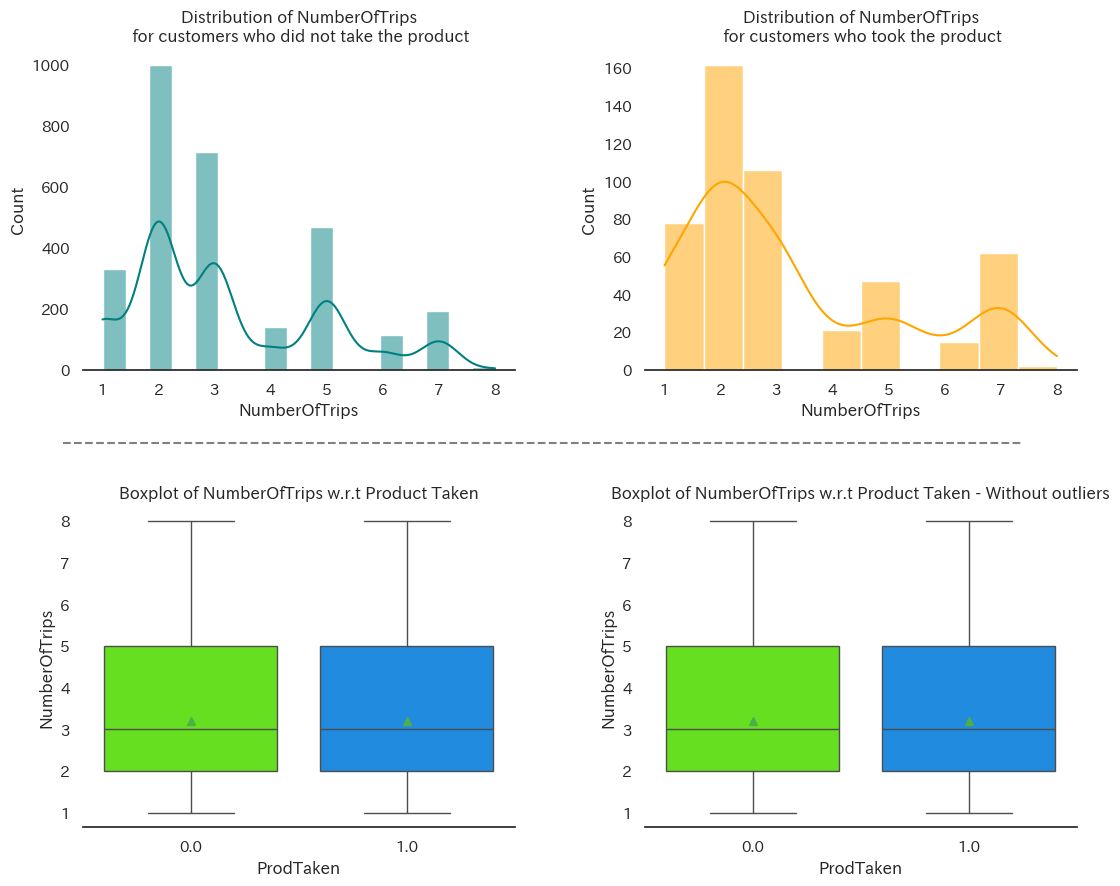

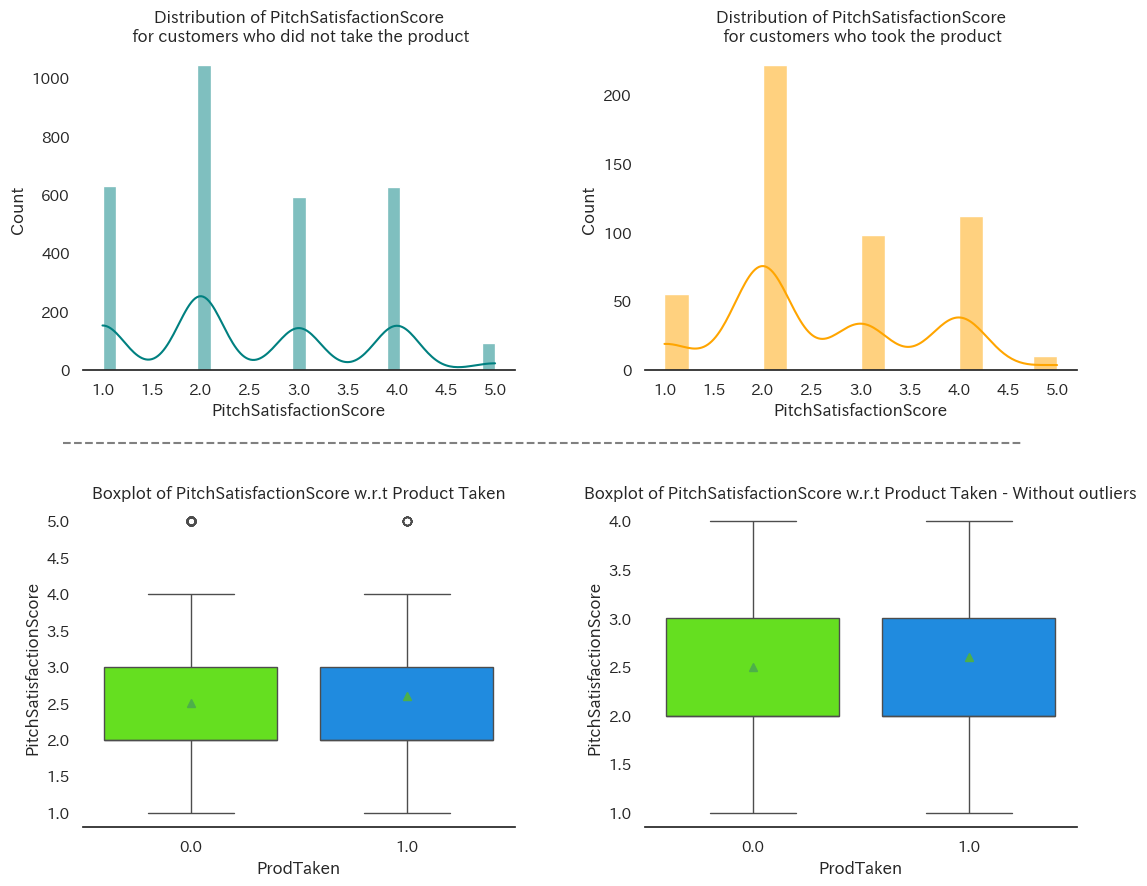

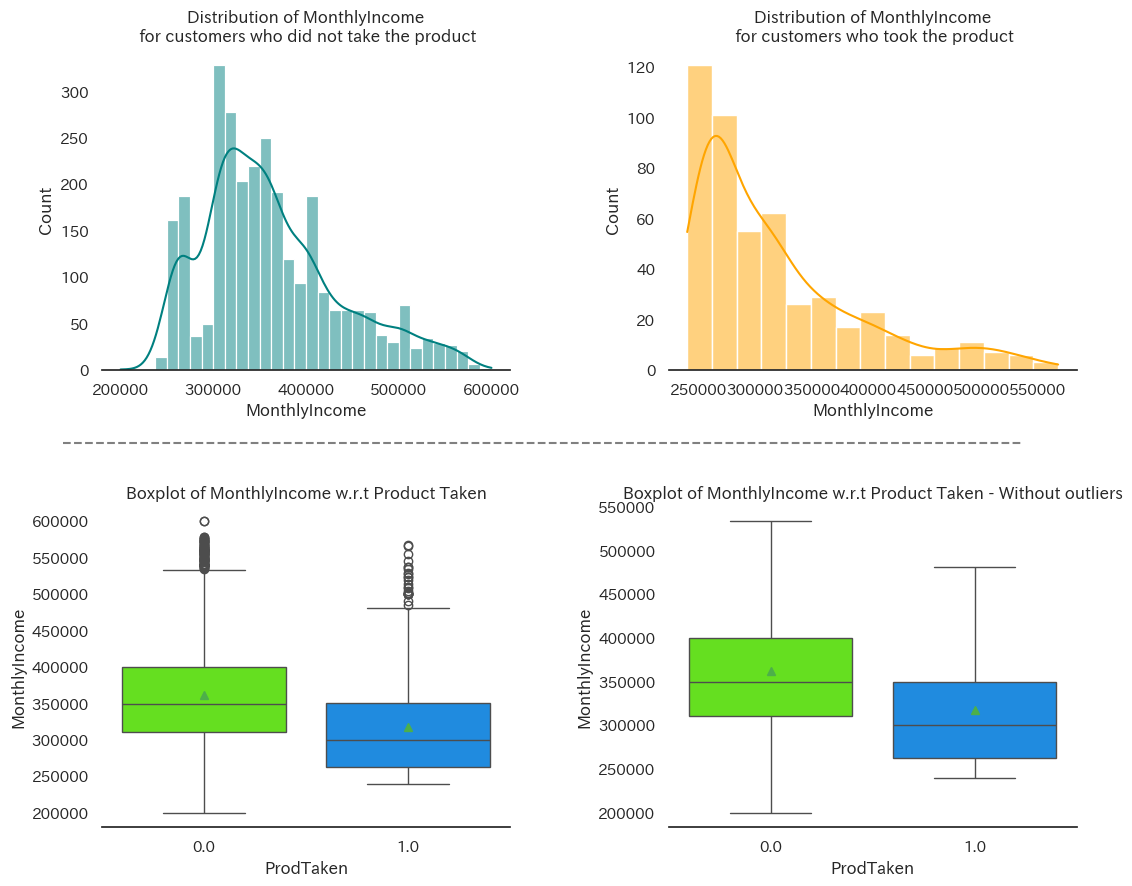

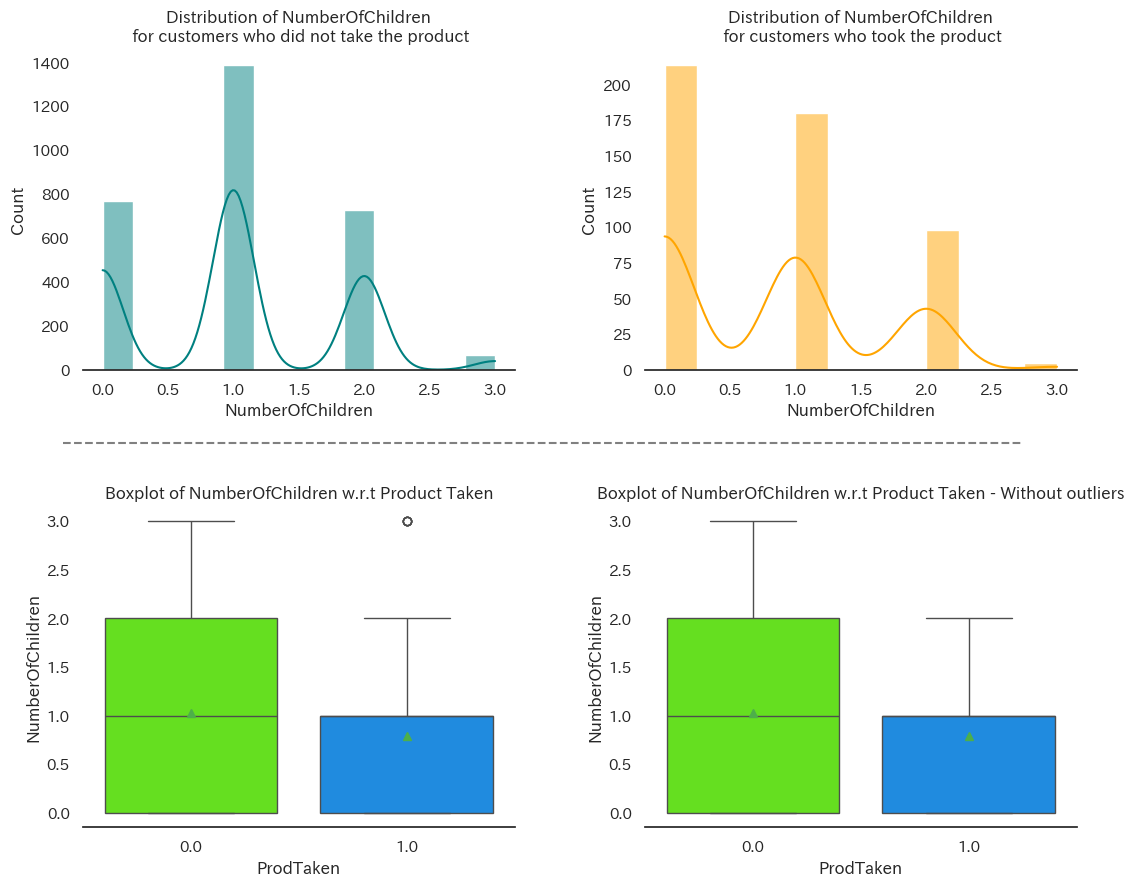

In [44]:
list_col=df_train.select_dtypes(include='number').columns.to_list()
#print(list_col)
#plt.figure(figsize=(14,23))
for j in range(len(list_col)):
   plot(list_col[j])

Text(0.5, 1.0, 'Monthly Income vs Occupation')

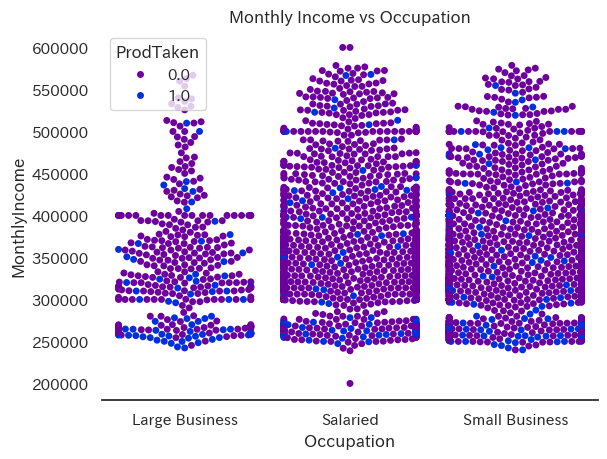

In [46]:
sns.set_palette(sns.color_palette("nipy_spectral", 8))
#月収と職業
sns.swarmplot(y='MonthlyIncome',x='Occupation',hue='ProdTaken',data=df_train)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.title('Monthly Income vs Occupation')

Text(0.5, 1.0, 'Monthly Income vs Age')

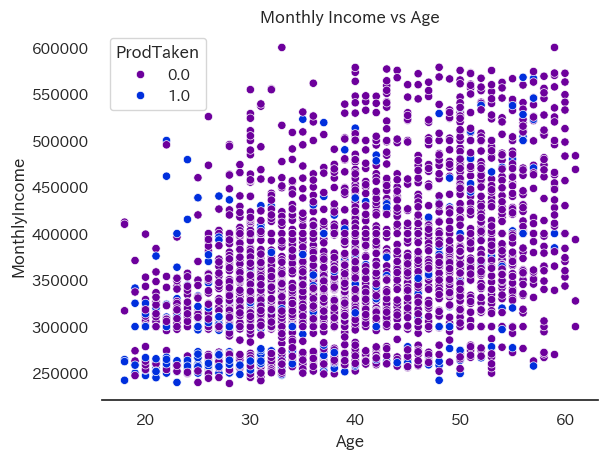

In [47]:
sns.set_palette(sns.color_palette("nipy_spectral", 8))
sns.scatterplot(y='MonthlyIncome',x='Age',hue='ProdTaken',data=df_train)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.title('Monthly Income vs Age')